<center><h1>Shengtao_Hou_HW4</h1></center>
<br>
<br>

Name: Shengtao Hou  
<br>
Github Username: Tonyhou521 
<br>
USC ID: 9712707229

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [264]:
import os
import numpy as np
import pandas as pd
## ignore warnings
import warnings
warnings.filterwarnings('ignore')
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import seaborn as sns
import glob

## logistic regression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


Get the AReM Data Set

In [265]:
def gen_stats(df, label):
    newdf = pd.DataFrame()
    minimum = []
    maximum = []
    mean = []
    median = []
    standard_deviation = []
    first_quartile = []
    third_quartile = []
    for col in df.columns:
                # print(col)
                if col != '# Columns: time':
                    minimum.append(df[col].min())
                    maximum.append(df[col].max())
                    mean.append(df[col].mean())
                    median.append(df[col].median())
                    standard_deviation.append(df[col].std())
                    first_quartile.append(df[col].quantile(0.25))
                    third_quartile.append(df[col].quantile(0.75))
    
    for i in range(len(minimum)):
        newdf["Min" + str(i+1)] = [minimum[i]]
        newdf["Max" + str(i+1)] = [maximum[i]]
        newdf["Mean" + str(i+1)] = [mean[i]]
        newdf["Median" + str(i+1)] = [median[i]]
        newdf["Std" + str(i+1)] = [standard_deviation[i]]
        newdf["1st" + str(i+1)] = [first_quartile[i]]
        newdf["3rd" + str(i+1)] = [third_quartile[i]]

    newdf['Label'] = label

    return newdf

dir_path = '../data/AReM/'

folders = glob.glob(dir_path + '/*/')

train_dfs = []
test_dfs = []

for folder in folders:
    files = glob.glob(folder + '/*')
    for f in files:
        strict_fn = f.split('.')[-2].split('/')[-1]
        loc = (f.split('.')[-2].split('/')[-2])
        df = pd.read_csv(f, skiprows=4)
        if ('bending1' in f or 'bending2' in f) and ('dataset1' == strict_fn or 'dataset2'== strict_fn):
            test_dfs.append(gen_stats(df, loc))
        elif ('dataset1'== strict_fn or 'dataset2'== strict_fn or 'dataset3'== strict_fn) and ('bending1' not in f and 'bending2' not in f):
            test_dfs.append(gen_stats(df, loc))
        else:
            train_dfs.append(gen_stats(df, loc))
            
train_df = pd.concat(train_dfs, ignore_index=True)
test_df = pd.concat(test_dfs, ignore_index=False)

display(train_df)

,Min1,Max1,Mean1,Median1,Std1,1st1,3rd1,Min2,Max2,Mean2,...,1st5,3rd5,Min6,Max6,Mean6,Median6,Std6,1st6,3rd6,Label
0,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.67,0.0,1.50,0.413125,...,20.5000,23.7500,0.0,2.96,0.555313,0.490,0.487826,0.0000,0.8300,bending1
1,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.00,0.0,1.58,0.378083,...,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.8700,bending1
2,33.00,47.75,42.179813,43.50,3.670666,39.1500,45.00,0.0,3.00,0.696042,...,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000,bending1
3,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.75,0.0,2.83,0.535979,...,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000,bending1
4,35.00,47.40,43.954500,44.33,1.558835,43.0000,45.00,0.0,1.70,0.426250,...,35.3625,36.5000,0.0,1.79,0.493292,0.430,0.513506,0.0000,0.9400,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.33,0.0,12.60,3.328104,...,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600,cycling
65,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,2.374208,...,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000,cycling
66,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,2.736021,...,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175,cycling
67,26.25,44.25,36.957458,36.29,3.434863,34.5000,40.25,0.0,8.64,2.420083,...,14.0000,18.2500,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.0300,cycling


## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

,Min1,Max1,Mean1,Median1,Std1,1st1,3rd1,Min2,Max2,Mean2,...,1st5,3rd5,Min6,Max6,Mean6,Median6,Std6,1st6,3rd6,Label
0,36.25,48.00,43.969125,44.50,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,20.5000,23.75,0.0,2.96,0.555313,0.490,0.487826,0.0000,0.830,1
1,37.00,48.00,43.454958,43.25,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,22.2500,24.00,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.870,1
2,33.00,47.75,42.179813,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.000,1
3,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.500,1
4,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.0000,0.940,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,20.75,46.25,34.763333,35.29,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.0500,4.305,0
7,18.00,46.00,35.193333,36.00,4.751868,32.00,38.7500,0.0,16.20,4.321021,...,14.2500,18.50,0.0,8.50,3.241958,3.015,1.769182,1.8850,4.440,0
6,21.50,51.00,34.935813,35.50,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.1200,4.500,0
5,18.33,47.67,34.333042,34.75,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.0500,4.320,0


,Min1,Max1,Mean1,Min2,Max2,Mean2,Min6,Max6,Mean6,Label
0,36.25,48.00,43.969125,0.0,1.50,0.413125,0.0,2.96,0.555313,1
1,37.00,48.00,43.454958,0.0,1.58,0.378083,0.0,5.26,0.679646,1
2,33.00,47.75,42.179813,0.0,3.00,0.696042,0.0,2.18,0.613521,1
3,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,1
4,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,1
...,...,...,...,...,...,...,...,...,...,...
8,20.75,46.25,34.763333,0.0,12.68,4.223792,0.0,9.39,3.288271,0
7,18.00,46.00,35.193333,0.0,16.20,4.321021,0.0,8.50,3.241958,0
6,21.50,51.00,34.935813,0.0,12.21,4.115750,0.0,10.21,3.280021,0
5,18.33,47.67,34.333042,0.0,12.48,4.396958,0.0,8.01,3.261583,0


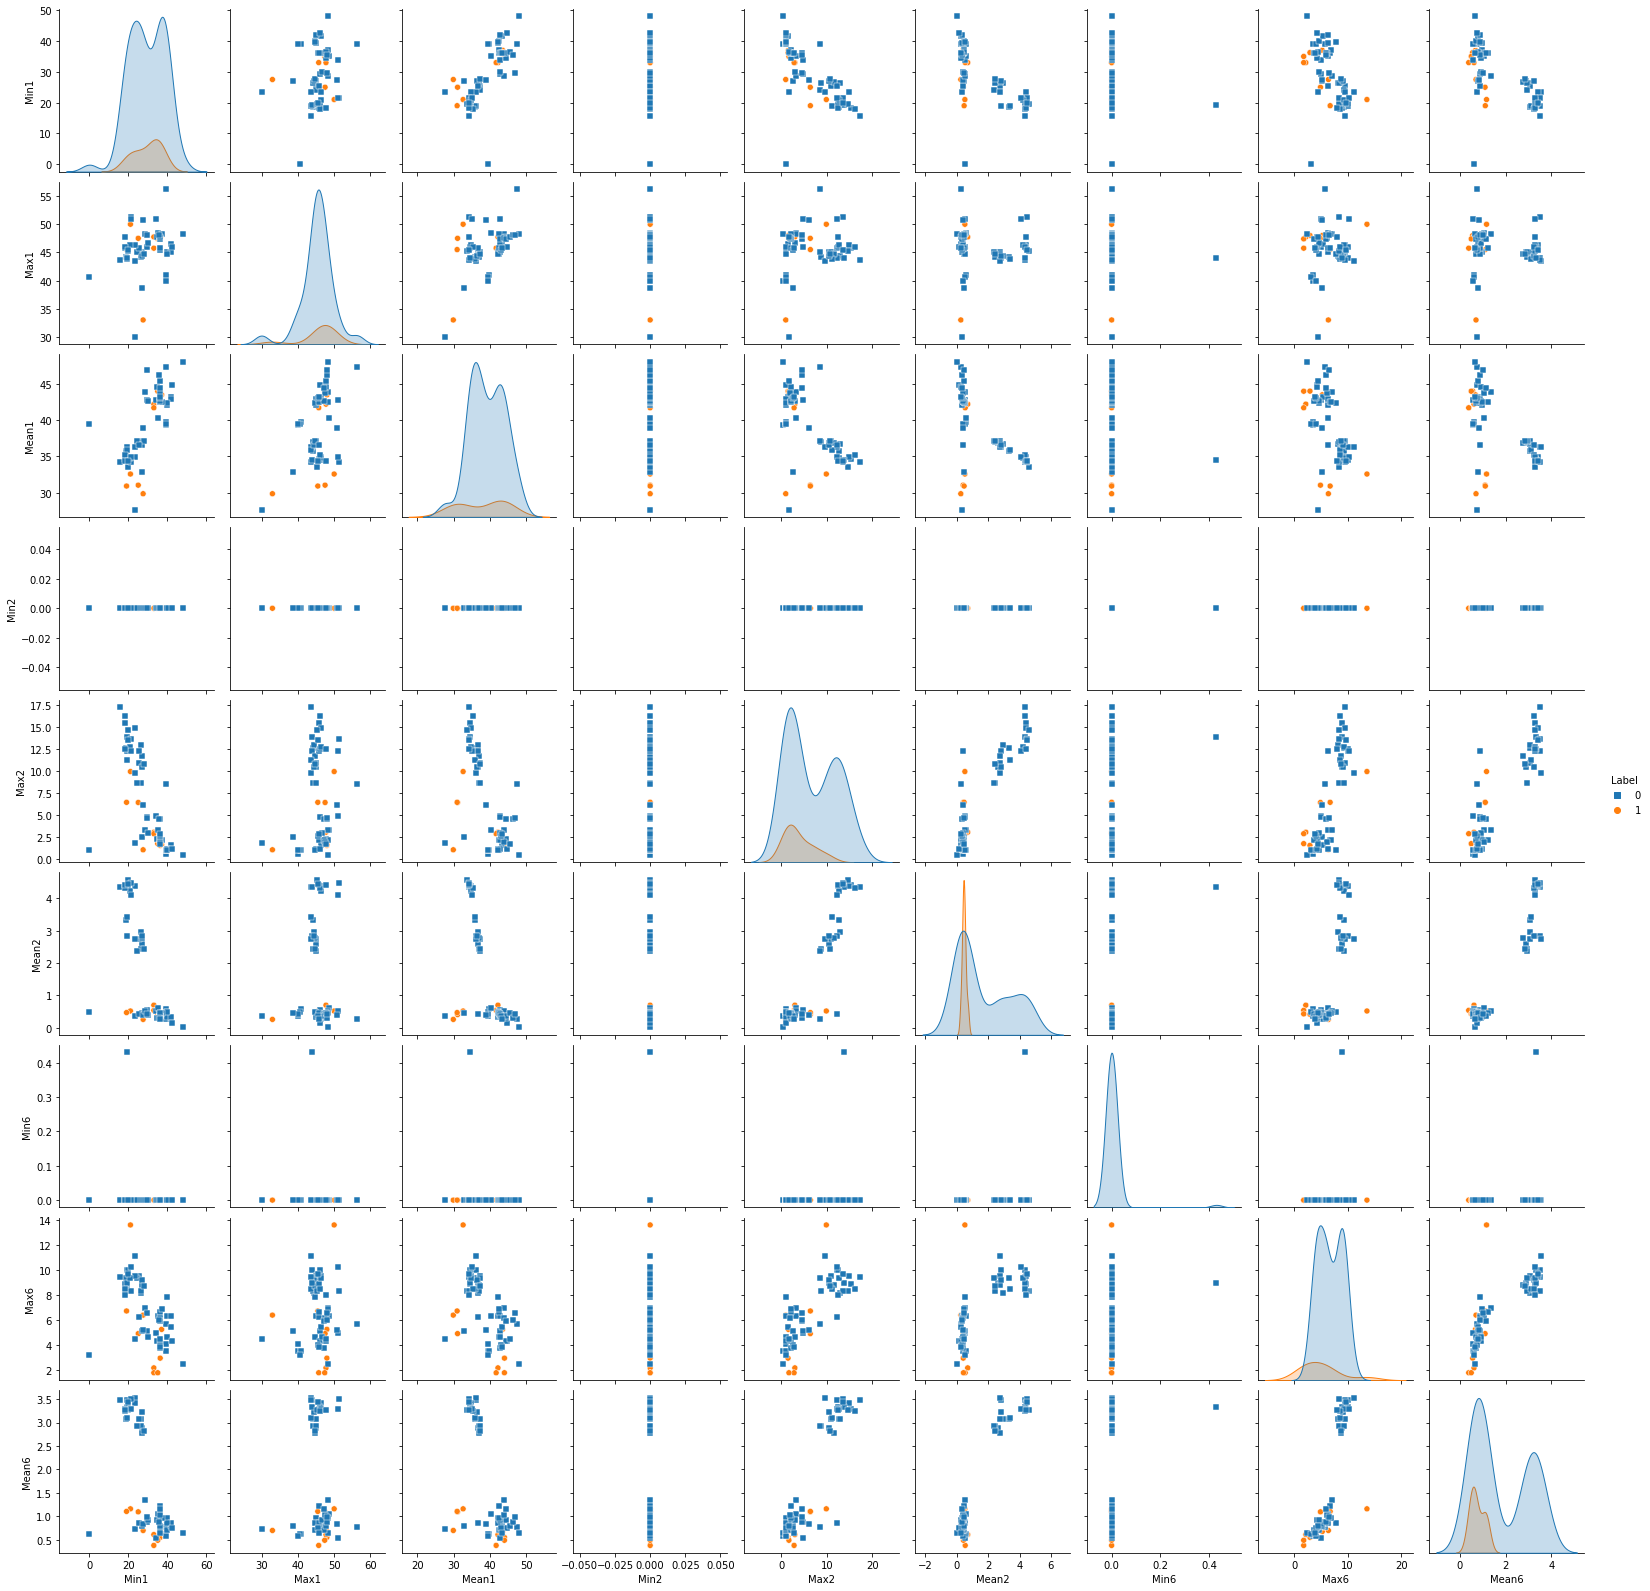

In [266]:
## if label is bending1 or bending2, then it is 1, else 0
## convert label column type to string
train_df['Label'] = train_df['Label'].astype(str)

train_df = train_df.sort_values(by=['Label'])
## if label is bending1 or bending2, then it is 1, else 0
train_df['Label'] = train_df['Label'].apply(lambda x: 1 if 'bending1' == x or 'bending2' == x else 0)


## create a new dataframe with only ['Min1','Max1','Mean1','Min2','Max2','Mean2','Min6','Max6','Mean6','Label']
Ai = train_df[['Min1','Max1','Mean1','Min2','Max2','Mean2','Min6','Max6','Mean6','Label']]

display(train_df)
display(Ai)

## scatterplot Ai

## convert label column type to string


sns.pairplot(Ai, hue='Label', markers = ["s", "o"])

#### ii. Splitted Plots

Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 4(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 4(a)i?

,Min11,Max11,Mean11,Min21,Max21,Mean21,Min61,Max61,Mean61,Min12,Max12,Mean12,Min22,Max22,Mean22,Min62,Max62,Mean62,Label
0,36.67,45.00,43.486208,0.0,1.30,0.378667,0.00,2.28,0.524875,36.25,48.00,44.452042,0.00,1.50,0.447583,0.0,2.96,0.585750,1
1,39.00,48.00,44.117042,0.0,1.30,0.250042,0.00,5.26,0.815417,37.00,46.50,42.792875,0.00,1.58,0.506125,0.0,4.06,0.543875,1
2,33.75,47.75,43.278875,0.0,3.00,0.673292,0.00,1.53,0.640958,33.00,46.00,41.080750,0.00,2.86,0.718792,0.0,2.18,0.586083,1
3,33.00,45.75,41.621208,0.0,2.83,0.623083,0.00,1.79,0.419083,39.25,43.67,41.734917,0.00,1.12,0.448875,0.0,1.50,0.347500,1
4,36.50,46.50,44.057167,0.0,1.50,0.381042,0.00,1.79,0.598250,35.00,47.40,43.851833,0.00,1.70,0.471458,0.0,1.50,0.388333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,22.33,46.00,34.966250,0.0,12.68,4.207958,0.00,8.83,3.146333,20.75,46.25,34.560417,0.43,12.09,4.239625,0.0,9.39,3.430208,0
7,18.00,45.67,35.236083,0.0,15.08,4.295417,0.00,7.89,3.106583,23.00,46.00,35.150583,0.00,16.20,4.346625,0.0,8.50,3.377333,0
6,21.50,45.67,34.737042,0.0,12.21,4.217333,0.00,9.19,3.334125,21.75,51.00,35.134583,0.00,11.41,4.014167,0.0,10.21,3.225917,0
5,18.33,45.00,33.886458,0.0,12.44,4.332208,0.43,7.89,3.248417,20.33,47.67,34.779625,0.00,12.48,4.461708,0.0,8.01,3.274750,0


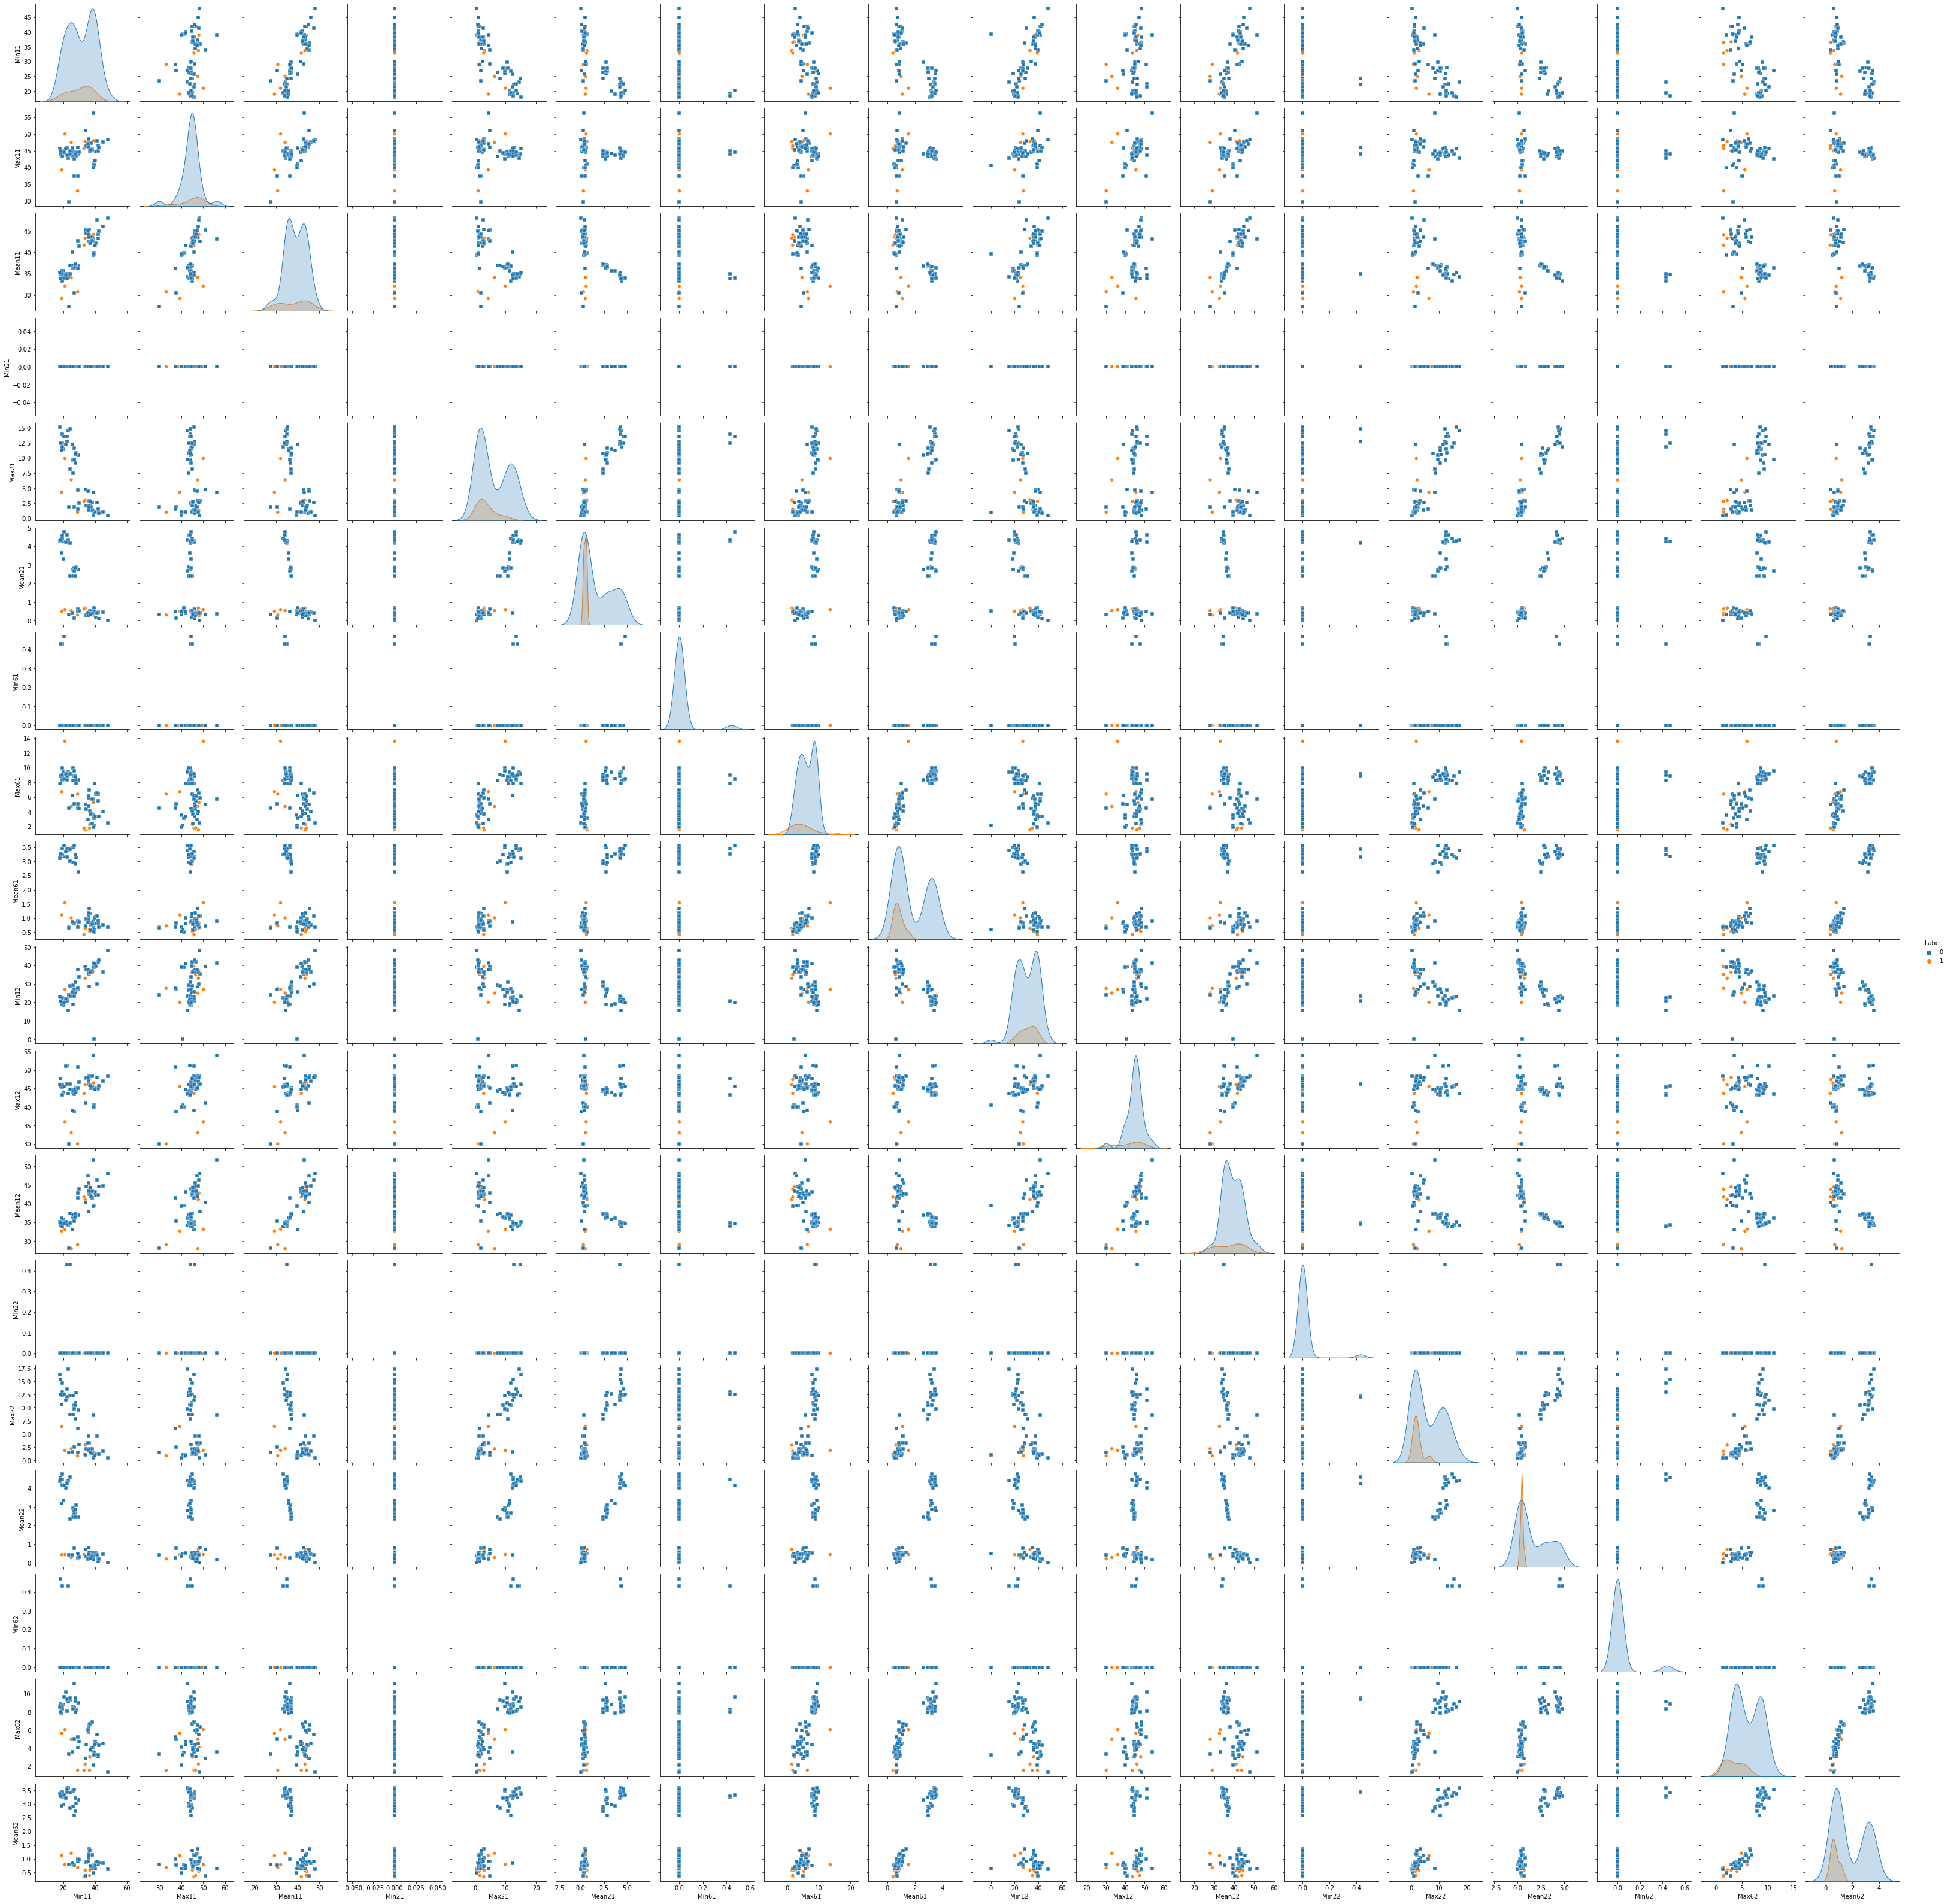

In [267]:
def gen_stats_split(df, label, split):
    ## for example, if split is two, we split the data into two parts and calculate the stats for each part separately
    newdf = pd.DataFrame()
    splitted = np.array_split(df, split)
    
    for i in range(len(splitted)):
        minimum = []
        maximum = []
        mean = []
        for col in splitted[i].columns:
            if col != '# Columns: time':
                minimum.append(splitted[i][col].min())
                maximum.append(splitted[i][col].max())
                mean.append(splitted[i][col].mean())
        # print(minimum)
        # print(maximum)
        # print(mean)

        for j in range(len(minimum)):
            newdf["Min" + str(j+1)+str(i+1)] = [minimum[j]]
            newdf["Max" + str(j+1)+str(i+1)] = [maximum[j]]
            newdf["Mean" + str(j+1)+str(i+1)] = [mean[j]]

    newdf['Label'] = label
    
    return newdf


def gen_df(split):
    dir_path = '../data/AReM/'

    folders = glob.glob(dir_path + '/*/')

    train_dfs = []
    test_dfs = []

    for folder in folders:
        files = glob.glob(folder + '/*')
        for f in files:
            strict_fn = f.split('.')[-2].split('/')[-1]
            loc = (f.split('.')[-2].split('/')[-2])
            df = pd.read_csv(f, skiprows=4)
            if ('bending1' in f or 'bending2' in f) and ('dataset1' == strict_fn or 'dataset2'== strict_fn):
                test_dfs.append(gen_stats_split(df, loc,split))
            elif ('dataset1'== strict_fn or 'dataset2'== strict_fn or 'dataset3'== strict_fn) and ('bending1' not in f and 'bending2' not in f):
                test_dfs.append(gen_stats_split(df, loc,split))
            else:
                train_dfs.append(gen_stats_split(df, loc,split))
    
    train_df = pd.concat(train_dfs, ignore_index=True)
    test_df = pd.concat(test_dfs, ignore_index=False)

    train_df['Label'] = train_df['Label'].astype(str)
    test_df['Label'] = test_df['Label'].astype(str)

    train_df = train_df.sort_values(by=['Label'])
    test_df = test_df.sort_values(by=['Label'])

    train_df['Label'] = train_df['Label'].apply(lambda x: 1 if 'bending1' == x or 'bending2' == x else 0)
    test_df['Label'] = test_df['Label'].apply(lambda x: 1 if 'bending1' == x or 'bending2' == x else 0)

    Aii_train = pd.DataFrame()
    Aii_test = pd.DataFrame()

    for i in range(1, split+1):
        cols = ['Min1'+str(i),'Max1'+str(i),'Mean1'+str(i),'Min2'+str(i),'Max2'+str(i),'Mean2'+str(i),'Min6'+str(i),'Max6'+str(i),'Mean6'+str(i)]
        # concatenate the columns
        df_train = train_df[cols]
        df_test = test_df[cols]
        ## if label already exists, then drop it
        Aii_train = pd.concat([Aii_train, df_train], axis=1)
        Aii_test = pd.concat([Aii_test, df_test], axis=1)

    Aii_train['Label'] = train_df['Label']
    Aii_test['Label'] = test_df['Label']
    
    
    return Aii_train, Aii_test


    


        
    
# dir_path = '../data/AReM/'

# folders = glob.glob(dir_path + '/*/')

# train_dfs = []
# test_dfs = []

# for folder in folders:
#     files = glob.glob(folder + '/*')
#     for f in files:
#         strict_fn = f.split('.')[-2].split('/')[-1]
#         loc = (f.split('.')[-2].split('/')[-2])
#         df = pd.read_csv(f, skiprows=4)
#         if ('bending1' in f or 'bending2' in f) and ('dataset1' == strict_fn or 'dataset2'== strict_fn):
#             test_dfs.append(gen_stats_split(df, loc,2))
#         elif ('dataset1'== strict_fn or 'dataset2'== strict_fn or 'dataset3'== strict_fn) and ('bending1' not in f and 'bending2' not in f):
#             test_dfs.append(gen_stats_split(df, loc,2))
#         else:
#             train_dfs.append(gen_stats_split(df, loc,2))
            
# train_df = pd.concat(train_dfs, ignore_index=True)
# test_df = pd.concat(test_dfs, ignore_index=False)


# train_df['Label'] = train_df['Label'].astype(str)

# train_df = train_df.sort_values(by=['Label'])
# ## if label is bending1 or bending2, then it is 1, else 0
# train_df['Label'] = train_df['Label'].apply(lambda x: 1 if 'bending1' == x or 'bending2' == x else 0)

# Aii = pd. DataFrame()

# for i in range(1,3): 
#     cols = ['Min1'+str(i),'Max1'+str(i),'Mean1'+str(i),'Min2'+str(i),'Max2'+str(i),'Mean2'+str(i),'Min6'+str(i),'Max6'+str(i),'Mean6'+str(i)]
#     # concatenate the columns
#     df = train_df[cols]
#     ## if label already exists, then drop it
#     Aii = pd.concat([Aii, df], axis=1)

# Aii['Label'] = train_df['Label']



Aii_train, Aii_test = gen_df(2)



display(Aii_train)

sns.pairplot(Aii_train, hue='Label', markers = ["s", "o"])

Answer: From what I can see, I do not see any clear difference from the scatterplots when compared with those of 4 (a)i
This is a method called time series segmentation.

By segmenting the time series data, we can capture different patterns and trends in the data that may be missed by using the entire time series as a single observation. This can improve the performance of the logistic regression model and make it more accurate in predicting future values.

#### iii. Time Series Segments

Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic re- gression.

In [269]:
# ## You will use all the time series but you will only use the 3 features you chose in HW3.  for L=20 you will have 360 features. 

# dir_path = '../data/AReM/'

# folders = glob.glob(dir_path + '/*/')

# train_dfs = []
# test_dfs = []

# for folder in folders:
#     files = glob.glob(folder + '/*')
#     for f in files:
#         strict_fn = f.split('.')[-2].split('/')[-1]
#         loc = (f.split('.')[-2].split('/')[-2])
#         df = pd.read_csv(f, skiprows=4)
#         if ('bending1' in f or 'bending2' in f) and ('dataset1' == strict_fn or 'dataset2'== strict_fn):
#             test_dfs.append(gen_stats_split(df, loc,20))
#         elif ('dataset1'== strict_fn or 'dataset2'== strict_fn or 'dataset3'== strict_fn) and ('bending1' not in f and 'bending2' not in f):
#             test_dfs.append(gen_stats_split(df, loc,20))
#         else:
#             train_dfs.append(gen_stats_split(df, loc,20))
            
# train_df = pd.concat(train_dfs, ignore_index=True)
# test_df = pd.concat(test_dfs, ignore_index=False)


# train_df['Label'] = train_df['Label'].astype(str)

# train_df = train_df.sort_values(by=['Label'])
# ## if label is bending1 or bending2, then it is 1, else 0
# train_df['Label'] = train_df['Label'].apply(lambda x: 1 if 'bending1' == x or 'bending2' == x else 0)

# Aiii = pd. DataFrame()

# for i in range(1,21): 
#     cols = ['Min1'+str(i),'Max1'+str(i),'Mean1'+str(i),'Min2'+str(i),'Max2'+str(i),'Mean2'+str(i),'Min6'+str(i),'Max6'+str(i),'Mean6'+str(i)]
#     # concatenate the columns
#     df = train_df[cols]
#     ## if label already exists, then drop it
#     Aiii = pd.concat([Aiii, df], axis=1)

# Aiii['Label'] = train_df['Label']




# display(train_df)
# display(Aiii)

In [270]:
# For 2(a) iii : If you're using sklearn, try setting parameters like tol=0.001, n_jobs=-1 to speed it up
# If you use @lru_cache(None) for the data_load function, it will cache the result for the next callings.


In [271]:
def logistic_regression(split,kfold, penalty = 'none'):
    print(f'Running Logistic Regression for l-value {split}')
    train_set, test_set = gen_df(split)
    X_train = train_set.drop('Label', axis=1)
    y_train = train_set['Label']
    X_test = test_set.drop('Label', axis=1)
    y_test = test_set['Label']

    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    validator = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=69)
    model = LogisticRegression(penalty=penalty, solver=solver, max_iter=10000)
    selector = RFECV(estimator=model, cv=validator, scoring='accuracy', n_jobs = -1)
    selector.fit(X_train, y_train)

    return model, selector


k_fold_cross_validation = 5
L = 20
chart = {
    'pair(l, p)': [],
    'score': []
}
for l_val in range(1, L + 1):
    model, selector = logistic_regression(l_val, k_fold_cross_validation)
    nf = selector.n_features_
    score = selector.cv_results_['mean_test_score'].max()
    chart['pair(l, p)'].append((l_val, nf))
    chart['score'].append(round(score, 4))

df = pd.DataFrame(chart)
df


Running Logistic Regression for l-value 1
Running Logistic Regression for l-value 2
Running Logistic Regression for l-value 3
Running Logistic Regression for l-value 4
Running Logistic Regression for l-value 5
Running Logistic Regression for l-value 6
Running Logistic Regression for l-value 7
Running Logistic Regression for l-value 8
Running Logistic Regression for l-value 9
Running Logistic Regression for l-value 10
Running Logistic Regression for l-value 11
Running Logistic Regression for l-value 12
Running Logistic Regression for l-value 13
Running Logistic Regression for l-value 14
Running Logistic Regression for l-value 15
Running Logistic Regression for l-value 16
Running Logistic Regression for l-value 17
Running Logistic Regression for l-value 18
Running Logistic Regression for l-value 19
Running Logistic Regression for l-value 20


,"pair(l, p)",score
0,"(1, 1)",0.8703
1,"(2, 14)",0.9132
2,"(3, 8)",0.9429
3,"(4, 25)",0.9143
4,"(5, 30)",0.9275
5,"(6, 39)",0.9407
6,"(7, 3)",0.8989
7,"(8, 46)",0.9132
8,"(9, 4)",0.9286
9,"(10, 82)",0.9429


Ans: We should be performing the Recursive Feature Eliminatin along with the cross validation with a nested loop approach. This ensures that the model is evaluated on unseen data and prevents data leakage from the test set to the training set
By performing RFE within each fold of the CV loop, we ensure that the selected features are based only on the training data for that fold and are not influenced by the validation data. This helps to prevent overfitting and provides a more accurate estimate of the model's performance on unseen data.
Therefore we used the RFECV fucntion to perform such operations here

In [272]:
## finding max in the score column and display the row
df.loc[df['score'].idxmax()]

pair(l, p)    (3, 8)
score         0.9429
Name: 2, dtype: object

In [273]:
l_val = 3
k_fold_cross_validation = 5
train_set, test_set = gen_df(l_val)
X_train = train_set.drop('Label', axis=1)
model, selector = logistic_regression(l_val, k_fold_cross_validation)

selected_features = X_train.columns[selector.support_].tolist()
# print(selected_features)

## p value for the selected features
import statsmodels.api as sm
train_set, test_set = gen_df(3)
train_set = train_set[selected_features + ['Label']]
test_set = test_set[selected_features + ['Label']]
X_train = train_set.drop('Label', axis=1)
y_train = train_set['Label']
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']

model = sm.Logit(y_train, sm.add_constant(X_train))
summary = model.fit(method='lbfgs',maxiter=30)
print(summary.summary())

Running Logistic Regression for l-value 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.62149D+01

At iterate    1    f=  4.87834D-01    |proj g|=  4.56336D+00

At iterate    2    f=  4.20590D-01    |proj g|=  3.27880D+00

At iterate    3    f=  3.81220D-01    |proj g|=  3.91724D-01

At iterate    4    f=  3.78756D-01    |proj g|=  4.31036D-01

At iterate    5    f=  3.71116D-01    |proj g|=  8.66199D-01

At iterate    6    f=  3.55869D-01    |proj g|=  1.54526D+00

At iterate    7    f=  3.39890D-01    |proj g|=  1.42160D+00

At iterate    8    f=  3.14563D-01    |proj g|=  8.99988D-01

At iterate    9    f=  2.78047D-01    |proj g|=  3.53656D-01

At iterate   10    f=  2.26293D-01    |proj g|=  3.20483D-01

At iterate   11    f=  1.99750D-01    |proj g|=  2.09454D+00

At iterate   12    f=  1.50656D-01    |proj g|

 This problem is unconstrained.


[[60  0]
 [ 1  8]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0.5, 'AUC: 0.94')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


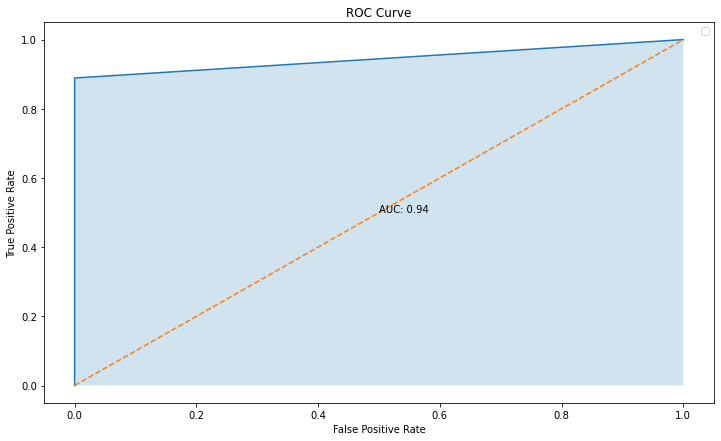

In [274]:
## confusion matrix
y_pred = summary.predict(sm.add_constant(X_train))
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_train, y_pred.round())
print(cm)

import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred.round(),pos_label=1)
## aoc
auc = metrics.auc(fpr, tpr)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr)
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.set_title('ROC Curve')
axes.text(0.5, 0.5, f'AUC: {auc:.2f}')
## auc area highlight
axes.fill_between(fpr, tpr, alpha=0.2)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

#### iv. Confusion Matrix

#### v. Test Classifier

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.38182D+01

At iterate    1    f=  5.36656D-01    |proj g|=  4.41706D+00

At iterate    2    f=  4.84273D-01    |proj g|=  2.14311D+00

At iterate    3    f=  4.73311D-01    |proj g|=  1.66561D+00

At iterate    4    f=  4.68875D-01    |proj g|=  3.86059D-01

At iterate    5    f=  4.62122D-01    |proj g|=  4.48611D-01

At iterate    6    f=  4.49705D-01    |proj g|=  1.50417D-01

At iterate    7    f=  4.48160D-01    |proj g|=  1.27689D-01

At iterate    8    f=  4.44638D-01    |proj g|=  2.71050D-01

At iterate    9    f=  4.39530D-01    |proj g|=  4.87907D-01

At iterate   10    f=  4.30839D-01    |proj g|=  6.01268D-01

At iterate   11    f=  4.19716D-01    |proj g|=  4.84906D-01

At iterate   12    f=  4.08654D-01    |proj g|=  3.72521D-01

At iterate   13    f=  3.9

 This problem is unconstrained.


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0.5, 'AUC: 0.72')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


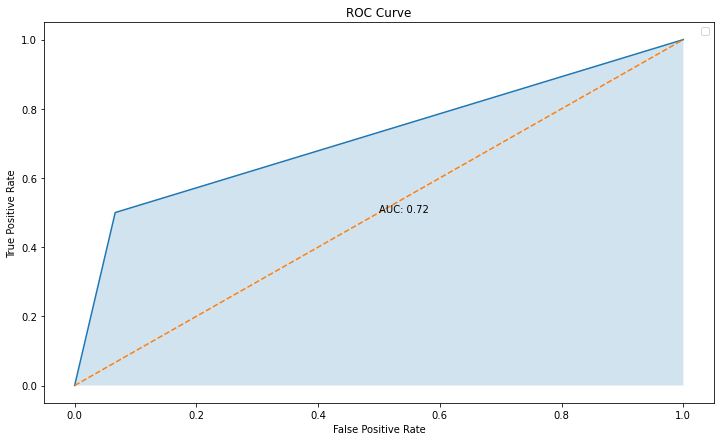

In [275]:
model = sm.Logit(y_test, sm.add_constant(X_test))
summary = model.fit(method='lbfgs',maxiter=30)
print(summary.summary())

## confusion matrix
y_pred = summary.predict(sm.add_constant(X_test))
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred.round())
print(cm)

import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred.round(),pos_label=1)
## aoc
auc = metrics.auc(fpr, tpr)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr)
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.set_title('ROC Curve')
axes.text(0.5, 0.5, f'AUC: {auc:.2f}')
## auc area highlight
axes.fill_between(fpr, tpr, alpha=0.2)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

For mine the accuracy 16/19 = 0.84 which is lower than the previous model.

#### vi. Separation

it is possible that the well-separation of the classes is cauisng the instability in calculation ofthe regression parameters.

#### vii. Imbalance

Yes, there are definetly imbalanced classes. There are 69 instances of non-bending classes and 9 instances for bending classes

In [276]:
# def oversample_data_set(data_set):
#     print('Performing oversampling of dataset...')
#     label_0 = data_set.loc[data_set['label'] == "0"].shape[0]
#     label_1 = data_set.loc[data_set['label'] == "1"].shape[0]
#     minor_count = min(label_0, label_1)
#     major_count = max(label_0, label_1)
    
#     if label_0 > label_1:
#         minor_label = "1"
#         major_label = "0"
#     else:
#         minor_label = "0"
#         major_label = "1"
        
#     minor_ds = data_set[data_set['label'] == minor_label]
#     major_ds = data_set[data_set['label'] == major_label]
#     minor_ds = resample(minor_ds, replace=True, random_state=60, n_samples=max(label_0, label_1))
#     data_set = pd.concat([major_ds, minor_ds])
#     return data_set


from imblearn.over_sampling import RandomOverSampler




def logistic_regression_oversample(split,kfold, penalty = 'none'):
    print(f'Running Logistic Regression for l-value {split}')
    train_set, test_set = gen_df(split)

    
    X_train = train_set.drop('Label', axis=1)
    y_train = train_set['Label']
    X_test = test_set.drop('Label', axis=1)
    y_test = test_set['Label']

    sampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    validator = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=69)
    model = LogisticRegression(penalty=penalty, solver=solver, max_iter=10000)
    selector = RFECV(estimator=model, cv=validator, scoring='accuracy', n_jobs=-1)
    selector.fit(X_train_resampled, y_train_resampled)

    return model, selector




print("Performing logistic regression with oversampling=True")

k_fold_cross_validation = 5
L = 20
chart = {
    'pair(l, p)': [],
    'score': []
}
for l_val in range(1, L + 1):
    model, selector = logistic_regression_oversample(l_val, k_fold_cross_validation)
    nf = selector.n_features_
    score = selector.cv_results_['mean_test_score'].max()
    chart['pair(l, p)'].append((l_val, nf))
    chart['score'].append(round(score, 4))

df = pd.DataFrame(chart)
df

Performing logistic regression with oversampling=True
Running Logistic Regression for l-value 1
Running Logistic Regression for l-value 2
Running Logistic Regression for l-value 3
Running Logistic Regression for l-value 4
Running Logistic Regression for l-value 5
Running Logistic Regression for l-value 6
Running Logistic Regression for l-value 7
Running Logistic Regression for l-value 8
Running Logistic Regression for l-value 9
Running Logistic Regression for l-value 10
Running Logistic Regression for l-value 11
Running Logistic Regression for l-value 12
Running Logistic Regression for l-value 13
Running Logistic Regression for l-value 14
Running Logistic Regression for l-value 15
Running Logistic Regression for l-value 16
Running Logistic Regression for l-value 17
Running Logistic Regression for l-value 18
Running Logistic Regression for l-value 19
Running Logistic Regression for l-value 20


,"pair(l, p)",score
0,"(1, 6)",0.9750
1,"(2, 9)",0.9583
2,"(3, 6)",0.9917
3,"(4, 11)",0.9750
4,"(5, 9)",0.9833
5,"(6, 31)",0.9833
6,"(7, 39)",0.9833
7,"(8, 22)",0.9917
8,"(9, 11)",0.9917
9,"(10, 38)",0.9833


In [277]:
## finding max in the score column and display the row
df.loc[df['score'].idxmax()]

pair(l, p)    (3, 6)
score         0.9917
Name: 2, dtype: object

In [278]:
l_val = 3
k_fold_cross_validation = 5
train_set, test_set = gen_df(l_val)
X_train = train_set.drop('Label', axis=1)
model, selector = logistic_regression_oversample(l_val, k_fold_cross_validation)

selected_features = X_train.columns[selector.support_].tolist()
# print(selected_features)

## p value for the selected features
import statsmodels.api as sm
train_set, test_set = gen_df(3)
train_set = train_set[selected_features + ['Label']]
test_set = test_set[selected_features + ['Label']]
X_train = train_set.drop('Label', axis=1)
y_train = train_set['Label']
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']

sampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = sampler.fit_resample(X_test, y_test)

model = sm.Logit(y_train, sm.add_constant(X_train))
summary = model.fit(method='lbfgs',maxiter=30)
print(summary.summary())

Running Logistic Regression for l-value 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.62149D+01

At iterate    1    f=  4.87902D-01    |proj g|=  4.55565D+00

At iterate    2    f=  4.20854D-01    |proj g|=  3.26645D+00

At iterate    3    f=  3.81914D-01    |proj g|=  3.96439D-01

At iterate    4    f=  3.79600D-01    |proj g|=  4.36049D-01

At iterate    5    f=  3.72503D-01    |proj g|=  8.38460D-01

At iterate    6    f=  3.57624D-01    |proj g|=  1.54242D+00

At iterate    7    f=  3.42130D-01    |proj g|=  1.46019D+00

At iterate    8    f=  3.15340D-01    |proj g|=  9.77927D-01

At iterate    9    f=  2.72521D-01    |proj g|=  3.87944D-01

At iterate   10    f=  2.16286D-01    |proj g|=  3.53184D-01

At iterate   11    f=  1.88584D-01    |proj g|=  2.17176D+00

At iterate   12    f=  1.44088D-01    |proj g|

 This problem is unconstrained.


[[60  0]
 [ 0  9]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0.5, 'AUC: 1.00')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


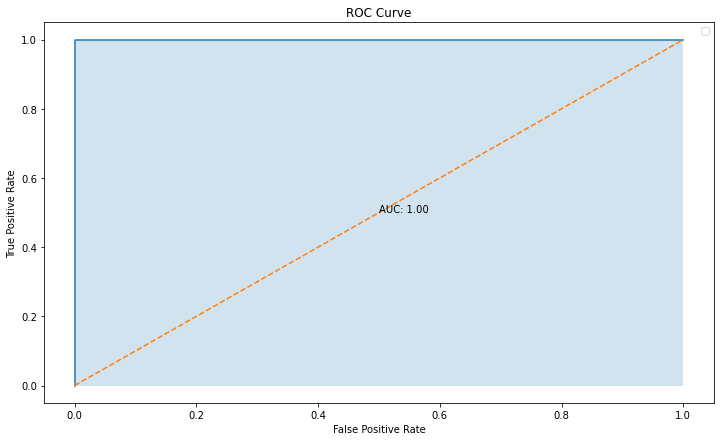

In [279]:
## confusion matrix
y_pred = summary.predict(sm.add_constant(X_train))
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_train, y_pred.round())
print(cm)

import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred.round(),pos_label=1)
## aoc
auc = metrics.auc(fpr, tpr)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr)
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.set_title('ROC Curve')
axes.text(0.5, 0.5, f'AUC: {auc:.2f}')
## auc area highlight
axes.fill_between(fpr, tpr, alpha=0.2)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.38182D+01

At iterate    1    f=  5.36728D-01    |proj g|=  4.40587D+00

At iterate    2    f=  4.84560D-01    |proj g|=  2.13012D+00

At iterate    3    f=  4.73787D-01    |proj g|=  1.65449D+00

At iterate    4    f=  4.69470D-01    |proj g|=  3.89825D-01

At iterate    5    f=  4.63128D-01    |proj g|=  4.20522D-01

At iterate    6    f=  4.50851D-01    |proj g|=  1.95572D-01

At iterate    7    f=  4.49541D-01    |proj g|=  1.21960D-01

At iterate    8    f=  4.47244D-01    |proj g|=  3.03488D-01

At iterate    9    f=  4.44639D-01    |proj g|=  5.05860D-01

At iterate   10    f=  4.39063D-01    |proj g|=  6.90066D-01

At iterate   11    f=  4.31166D-01    |proj g|=  6.64833D-01

At iterate   12    f=  4.13711D-01    |proj g|=  4.29021D-01

At iterate   13    f=  4.0

 This problem is unconstrained.


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0.5, 'AUC: 0.88')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


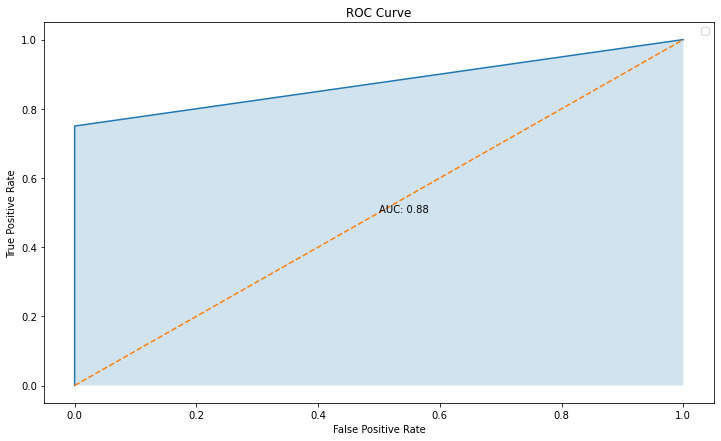

In [280]:
model = sm.Logit(y_test, sm.add_constant(X_test))
summary = model.fit(method='lbfgs',maxiter=30)
print(summary.summary())

## confusion matrix
y_pred = summary.predict(sm.add_constant(X_test))
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred.round())
print(cm)

import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred.round(),pos_label=1)
## aoc
auc = metrics.auc(fpr, tpr)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr)
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.set_title('ROC Curve')
axes.text(0.5, 0.5, f'AUC: {auc:.2f}')
## auc area highlight
axes.fill_between(fpr, tpr, alpha=0.2)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [281]:
from sklearn.linear_model import LogisticRegressionCV

max_test_accuracy = 0
optimal_L = 1

def logistic_regression_l1(classifier,split,kwargs):
    print(f'Running L1-penalized logistic regression for l-value {l_val}')
    train_set, test_set = gen_df(split)
    X_train = train_set.drop('Label', axis=1)
    y_train = train_set['Label']
    X_test = test_set.drop('Label', axis=1)
    y_test = test_set['Label']


    classifier2 = classifier(**kwargs)
    classifier2.fit(X_train, y_train)


    train_score = round(classifier2.score(X_train, y_train), 4)
    test_score = round(classifier2.score(X_test, y_test), 4)
    print(f'Value of L: {l_val} | train_score: {train_score} | test_score: {test_score}')
    print(f'Value of L: {l_val} | train_error: {round((1 - train_score), 4)} | test_error: {round((1 - test_score), 4)}\n')
    global max_test_accuracy
    global optimal_L
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        optimal_L = l_val
        
    if l_val == 20:
        print('\n')
        print(f'The maximum accuracy is {max_test_accuracy} (for L-value: {optimal_L})')
        print(f'Further calculations will be done with L-value: {optimal_L}')

    return classifier2


kwargs = {
    'penalty' : 'l1', 
    'max_iter' : 100,
    'scoring' : 'accuracy',
    'cv' : 5,
    'random_state' : 69,
    'solver' : 'liblinear'
}


for l_val in range(1, 21):
    selector = logistic_regression_l1(LogisticRegressionCV,l_val, kwargs)


Running L1-penalized logistic regression for l-value 1
Value of L: 1 | train_score: 0.8986 | test_score: 0.8947
Value of L: 1 | train_error: 0.1014 | test_error: 0.1053

Running L1-penalized logistic regression for l-value 2
Value of L: 2 | train_score: 0.8696 | test_score: 0.7895
Value of L: 2 | train_error: 0.1304 | test_error: 0.2105

Running L1-penalized logistic regression for l-value 3
Value of L: 3 | train_score: 0.8696 | test_score: 0.7895
Value of L: 3 | train_error: 0.1304 | test_error: 0.2105

Running L1-penalized logistic regression for l-value 4
Value of L: 4 | train_score: 0.8696 | test_score: 0.7895
Value of L: 4 | train_error: 0.1304 | test_error: 0.2105

Running L1-penalized logistic regression for l-value 5
Value of L: 5 | train_score: 1.0 | test_score: 0.8421
Value of L: 5 | train_error: 0.0 | test_error: 0.1579

Running L1-penalized logistic regression for l-value 6
Value of L: 6 | train_score: 0.971 | test_score: 0.7895
Value of L: 6 | train_error: 0.029 | test_err

Running L1-penalized logistic regression for l-value 1
Display ROC for train set


LogisticRegressionCV(cv=5, penalty='l1', random_state=69, scoring='accuracy',
                     solver='liblinear')

[[60  0]
 [ 0  9]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0.5, 'AUC: 1.00')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


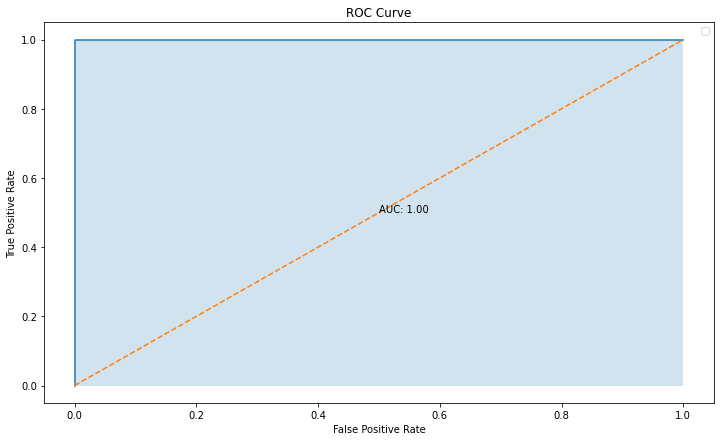

In [282]:
print(f'Running L1-penalized logistic regression for l-value {1}')
print(f'Display ROC for train set')
train_set, test_set = gen_df(15)
X_train = train_set.drop('Label', axis=1)
y_train = train_set['Label']
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']


classifier2 = LogisticRegressionCV(**kwargs)
classifier2.fit(X_train, y_train)

## confusion matrix
y_pred = classifier2.predict(X_train)
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_train, y_pred.round())
print(cm)

import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred.round(),pos_label=1)
## aoc
auc = metrics.auc(fpr, tpr)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr)
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.set_title('ROC Curve')
axes.text(0.5, 0.5, f'AUC: {auc:.2f}')
## auc area highlight
axes.fill_between(fpr, tpr, alpha=0.2)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

Running L1-penalized logistic regression for l-value 1
Display ROC for test set


LogisticRegressionCV(cv=5, penalty='l1', random_state=69, scoring='accuracy',
                     solver='liblinear')

[[15  0]
 [ 3  1]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0.5, 'AUC: 0.62')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


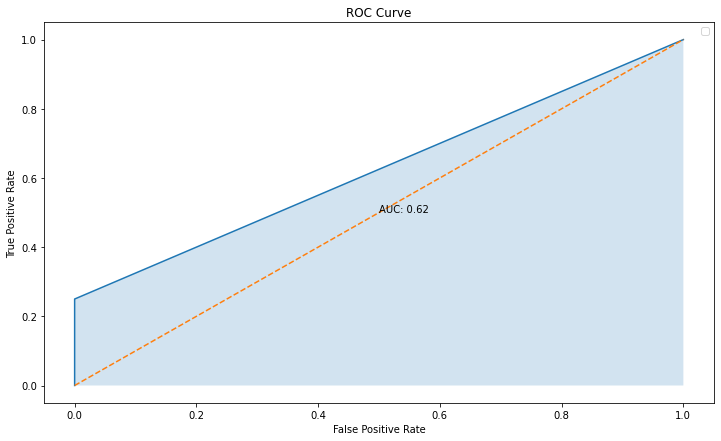

In [283]:
print(f'Running L1-penalized logistic regression for l-value {1}')
print(f'Display ROC for test set')
train_set, test_set = gen_df(5)
X_train = train_set.drop('Label', axis=1)
y_train = train_set['Label']
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']


classifier2 = LogisticRegressionCV(**kwargs)
classifier2.fit(X_train, y_train)

## confusion matrix
y_pred = classifier2.predict(X_test)
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred.round())
print(cm)

import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred.round(),pos_label=1)
## aoc
auc = metrics.auc(fpr, tpr)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr)
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.set_title('ROC Curve')
axes.text(0.5, 0.5, f'AUC: {auc:.2f}')
## auc area highlight
axes.fill_between(fpr, tpr, alpha=0.2)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

#### ii. Comparison

18/19 = 0.947
16/19 = 0.84

My L1 penalized model performed worse than the variable seiection p values model. This is because L1 penalized model tend to yield false positives as we can see from the confusion matrix above. However, I think L1 penalized is easier to perform.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

Find the best l in the same way as you found it in 4(b)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.11

In [284]:
from sklearn.linear_model import LogisticRegressionCV

max_test_accuracy = 0
optimal_L = 1
def gen_df_multi(split):
    dir_path = '../data/AReM/'

    folders = glob.glob(dir_path + '/*/')

    train_dfs = []
    test_dfs = []

    for folder in folders:
        files = glob.glob(folder + '/*')
        for f in files:
            strict_fn = f.split('.')[-2].split('/')[-1]
            loc = (f.split('.')[-2].split('/')[-2])
            df = pd.read_csv(f, skiprows=4)
            if ('bending1' in f or 'bending2' in f) and ('dataset1' == strict_fn or 'dataset2'== strict_fn):
                test_dfs.append(gen_stats_split(df, loc,split))
            elif ('dataset1'== strict_fn or 'dataset2'== strict_fn or 'dataset3'== strict_fn) and ('bending1' not in f and 'bending2' not in f):
                test_dfs.append(gen_stats_split(df, loc,split))
            else:
                train_dfs.append(gen_stats_split(df, loc,split))
    
    train_df = pd.concat(train_dfs, ignore_index=True)
    test_df = pd.concat(test_dfs, ignore_index=False)

    train_df['Label'] = train_df['Label'].astype(str)
    test_df['Label'] = test_df['Label'].astype(str)

    train_df = train_df.sort_values(by=['Label'])
    test_df = test_df.sort_values(by=['Label'])


    Aii_train = pd.DataFrame()
    Aii_test = pd.DataFrame()

    for i in range(1, split+1):
        cols = ['Min1'+str(i),'Max1'+str(i),'Mean1'+str(i),'Min2'+str(i),'Max2'+str(i),'Mean2'+str(i),'Min6'+str(i),'Max6'+str(i),'Mean6'+str(i)]
        # concatenate the columns
        df_train = train_df[cols]
        df_test = test_df[cols]
        ## if label already exists, then drop it
        Aii_train = pd.concat([Aii_train, df_train], axis=1)
        Aii_test = pd.concat([Aii_test, df_test], axis=1)

    Aii_train['Label'] = train_df['Label']
    Aii_test['Label'] = test_df['Label']
    
    
    return Aii_train, Aii_test
    

def logistic_regression_l1(classifier,split,kwargs):
    print(f'Running L1-penalized logistic regression for l-value {l_val}')
    train_set, test_set = gen_df_multi(split)
    X_train = train_set.drop('Label', axis=1)
    y_train = train_set['Label']
    X_test = test_set.drop('Label', axis=1)
    y_test = test_set['Label']


    classifier2 = classifier(**kwargs)
    classifier2.fit(X_train, y_train)


    train_score = round(classifier2.score(X_train, y_train), 4)
    test_score = round(classifier2.score(X_test, y_test), 4)
    print(f'Value of L: {l_val} | train_score: {train_score} | test_score: {test_score}')
    print(f'Value of L: {l_val} | train_error: {round((1 - train_score), 4)} | test_error: {round((1 - test_score), 4)}\n')
    global max_test_accuracy
    global optimal_L
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        optimal_L = l_val
        
    if l_val == 20:
        print('\n')
        print(f'The maximum accuracy is {max_test_accuracy} (for L-value: {optimal_L})')
        print(f'Further calculations will be done with L-value: {optimal_L}')

    return classifier2


kwargs = {
    'penalty' : 'l1', 
    'max_iter' : 100,
    'scoring' : 'accuracy',
    'cv' : 5,
    'random_state' : 69,
    'solver' : 'liblinear'
}


for l_val in range(1, 21):
    selector = logistic_regression_l1(LogisticRegressionCV,l_val, kwargs)

Running L1-penalized logistic regression for l-value 1
Value of L: 1 | train_score: 0.6232 | test_score: 0.5789
Value of L: 1 | train_error: 0.3768 | test_error: 0.4211

Running L1-penalized logistic regression for l-value 2
Value of L: 2 | train_score: 0.8261 | test_score: 0.5263
Value of L: 2 | train_error: 0.1739 | test_error: 0.4737

Running L1-penalized logistic regression for l-value 3
Value of L: 3 | train_score: 0.8551 | test_score: 0.5263
Value of L: 3 | train_error: 0.1449 | test_error: 0.4737

Running L1-penalized logistic regression for l-value 4
Value of L: 4 | train_score: 0.7971 | test_score: 0.5789
Value of L: 4 | train_error: 0.2029 | test_error: 0.4211

Running L1-penalized logistic regression for l-value 5
Value of L: 5 | train_score: 0.8551 | test_score: 0.5789
Value of L: 5 | train_error: 0.1449 | test_error: 0.4211

Running L1-penalized logistic regression for l-value 6
Value of L: 6 | train_score: 0.971 | test_score: 0.6316
Value of L: 6 | train_error: 0.029 | te

Running L1-penalized logistic regression for l-value 1
Display ROC for test set


LogisticRegressionCV(cv=5, penalty='l1', random_state=69, scoring='accuracy',
                     solver='liblinear')

[[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 11  0  0  1  0]
 [ 0  0  0  8  0  4  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

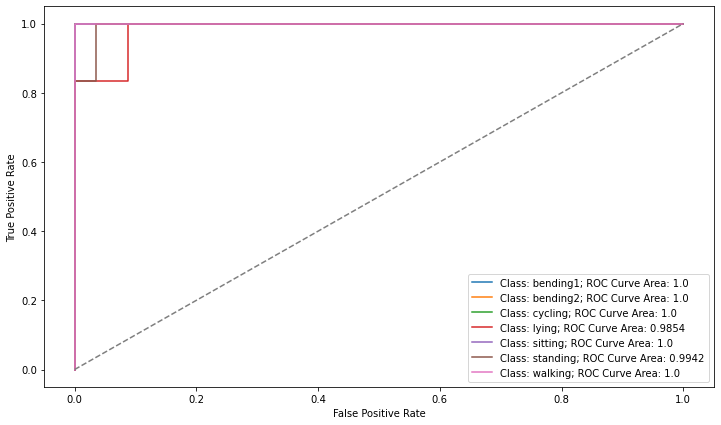

In [292]:
print(f'Running L1-penalized logistic regression for l-value {1}')
print(f'Display ROC for test set')
train_set, test_set = gen_df_multi(7)
X_train = train_set.drop('Label', axis=1)
y_train = train_set['Label']
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']


classifier2 = LogisticRegressionCV(**kwargs)
classifier2.fit(X_train, y_train)

## confusion matrix
y_pred = classifier2.predict(X_train)
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)

import matplotlib.pyplot as plt

## multi-class roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


## predictY probability
y_pred_proba = classifier2.predict_proba(X_train)

## roc curve for classes
fpr = {}
tpr = {}
thresh ={}

fig, axes = plt.subplots(figsize=(12, 7))
for i, classname in enumerate(classifier2.classes_):
    y_predicted = y_pred_proba[:, i]
    fpr, tpr, thresholds = roc_curve(y_train, y_predicted, pos_label=classname)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"Class: {classname}; ROC Curve Area: {round(roc_auc, 4)}")

axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()




# ## aoc
# auc = metrics.auc(fpr, tpr)
# fig, axes = plt.subplots(figsize=(12, 7))
# axes.plot(fpr, tpr)
# axes.set_xlabel('False Positive Rate')
# axes.set_ylabel('True Positive Rate')
# axes.set_title('ROC Curve')
# axes.text(0.5, 0.5, f'AUC: {auc:.2f}')
# ## auc area highlight
# axes.fill_between(fpr, tpr, alpha=0.2)
# axes.plot([0, 1], [0, 1], "--")
# axes.set_xlabel("False Positive Rate")
# axes.set_ylabel("True Positive Rate")
# axes.legend()
# plt.show()

Running L1-penalized logistic regression for l-value 1
Display ROC for test set


LogisticRegressionCV(cv=5, penalty='l1', random_state=69, scoring='accuracy',
                     solver='liblinear')

[[1 0 0 0 0 1 0]
 [0 0 0 0 0 2 0]
 [0 0 3 0 0 0 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 1 0 0 0 2]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

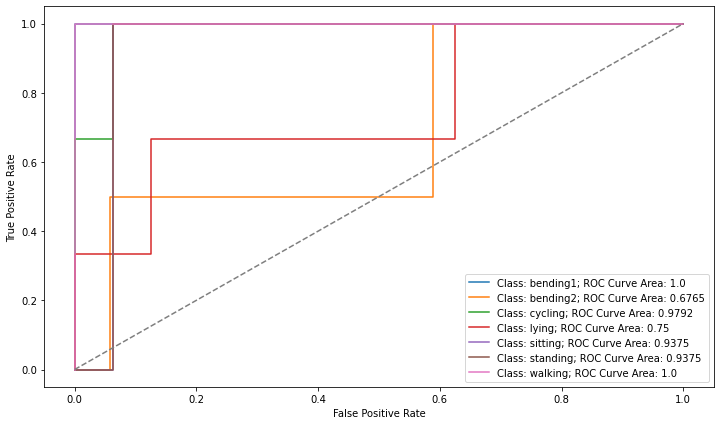

In [289]:
print(f'Running L1-penalized logistic regression for l-value {1}')
print(f'Display ROC for test set')
train_set, test_set = gen_df_multi(7)
X_train = train_set.drop('Label', axis=1)
y_train = train_set['Label']
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']


classifier2 = LogisticRegressionCV(**kwargs)
classifier2.fit(X_train, y_train)

## confusion matrix
y_pred = classifier2.predict(X_test)
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt

## multi-class roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


## predictY probability
y_pred_proba = classifier2.predict_proba(X_test)

## roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 6
fig, axes = plt.subplots(figsize=(12, 7))
for i, clazz in enumerate(classifier2.classes_):
    y_predicted = y_pred_proba[:, i]
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted, pos_label=clazz)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"Class: {clazz}; ROC Curve Area: {round(roc_auc, 4)}")

axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()


## plot roc curve
# fig, axes = plt.subplots(figsize=(12, 7))
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
# plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
# plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 4 vs Rest')
# plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 5 vs Rest')
# plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 6 vs Rest')

# plt.title('Multiclass ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc='best')
# plt.show()


# fig, axes = plt.subplots(figsize=(12, 7))
# axes.set_title("ROC curves")
# for i, clazz in enumerate(classifier.classes_):
#     y_predicted = predictedY_prob[:, i]
#     fpr, tpr, thresholds = roc_curve(actualY, y_predicted, pos_label=clazz)
#     roc_auc = auc(fpr, tpr)
#     axes.plot(fpr, tpr, label=f"Class: {clazz}; ROC Curve Area: {round(roc_auc, 4)}")
# axes.plot([0, 1], [0, 1], "--")
# axes.set_xlabel("False Positive Rate")
# axes.set_ylabel("True Positive Rate")
# axes.legend()
# plt.show()

#### ii. Naive Bayes

In [293]:
## naive bayes' classifier with Gaussian

from sklearn.naive_bayes import GaussianNB

max_test_accuracy = 0
optimal_L = 0
def logistic_regression_l1(classifier,split,kwargs):
    print(f'Running L1-penalized logistic regression for l-value {l_val}')
    train_set, test_set = gen_df_multi(split)
    X_train = train_set.drop('Label', axis=1)
    y_train = train_set['Label']
    X_test = test_set.drop('Label', axis=1)
    y_test = test_set['Label']


    classifier2 = classifier(**kwargs)
    classifier2.fit(X_train, y_train)


    train_score = round(classifier2.score(X_train, y_train), 4)
    test_score = round(classifier2.score(X_test, y_test), 4)
    print(f'Value of L: {l_val} | train_score: {train_score} | test_score: {test_score}')
    print(f'Value of L: {l_val} | train_error: {round((1 - train_score), 4)} | test_error: {round((1 - test_score), 4)}\n')
    global max_test_accuracy
    global optimal_L
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        optimal_L = l_val
        
    if l_val == 20:
        print('\n')
        print(f'The maximum accuracy is {max_test_accuracy} (for L-value: {optimal_L})')
        print(f'Further calculations will be done with L-value: {optimal_L}')

    return classifier2


kwargs = {

}


for l_val in range(1, 21):
    selector = logistic_regression_l1(GaussianNB,l_val, kwargs)

Running L1-penalized logistic regression for l-value 1
Value of L: 1 | train_score: 0.913 | test_score: 0.7895
Value of L: 1 | train_error: 0.087 | test_error: 0.2105

Running L1-penalized logistic regression for l-value 2
Value of L: 2 | train_score: 0.9275 | test_score: 0.7895
Value of L: 2 | train_error: 0.0725 | test_error: 0.2105

Running L1-penalized logistic regression for l-value 3
Value of L: 3 | train_score: 0.8406 | test_score: 0.5789
Value of L: 3 | train_error: 0.1594 | test_error: 0.4211

Running L1-penalized logistic regression for l-value 4
Value of L: 4 | train_score: 0.8406 | test_score: 0.6842
Value of L: 4 | train_error: 0.1594 | test_error: 0.3158

Running L1-penalized logistic regression for l-value 5
Value of L: 5 | train_score: 0.8551 | test_score: 0.5789
Value of L: 5 | train_error: 0.1449 | test_error: 0.4211

Running L1-penalized logistic regression for l-value 6
Value of L: 6 | train_score: 0.8551 | test_score: 0.5789
Value of L: 6 | train_error: 0.1449 | te

Running Baive Bayes Classifier with Gaussian Prior logistic regression for l-value 1
Display ROC for test set


GaussianNB()

[[ 4  0  0  0  0  1  0]
 [ 0  3  0  1  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  2 10  0  0]
 [ 1  0  0  0  1 10  0]
 [ 0  0  0  0  0  0 12]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

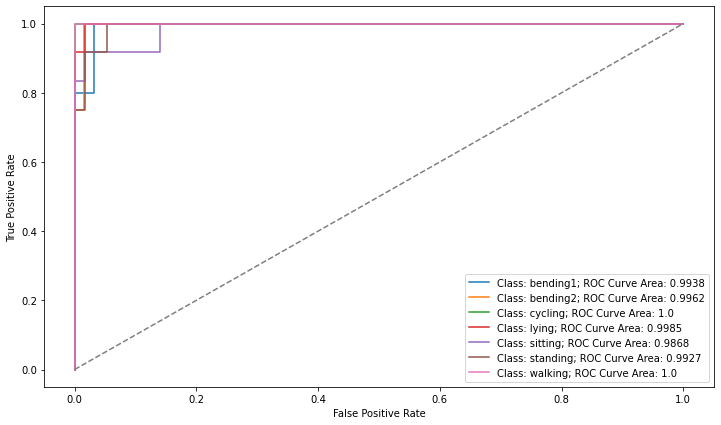

In [295]:
print(f'Running Baive Bayes Classifier with Gaussian Prior logistic regression for l-value {optimal_L}')
print(f'Display ROC for test set')
train_set, test_set = gen_df_multi(optimal_L)
X_train = train_set.drop('Label', axis=1)
y_train = train_set['Label']
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']


classifier2 = GaussianNB()
classifier2.fit(X_train, y_train)

## confusion matrix
y_pred = classifier2.predict(X_train)
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)

import matplotlib.pyplot as plt

## multi-class roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


## predictY probability
y_pred_proba = classifier2.predict_proba(X_train)

## roc curve for classes
fpr = {}
tpr = {}
thresh ={}

fig, axes = plt.subplots(figsize=(12, 7))
for i, classname in enumerate(classifier2.classes_):
    y_predicted = y_pred_proba[:, i]
    fpr, tpr, thresholds = roc_curve(y_train, y_predicted, pos_label=classname)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"Class: {classname}; ROC Curve Area: {round(roc_auc, 4)}")

axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

Running Baive Bayes Classifier with Gaussian Prior logistic regression for l-value 1
Display ROC for test set


GaussianNB()

[[1 0 0 1 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

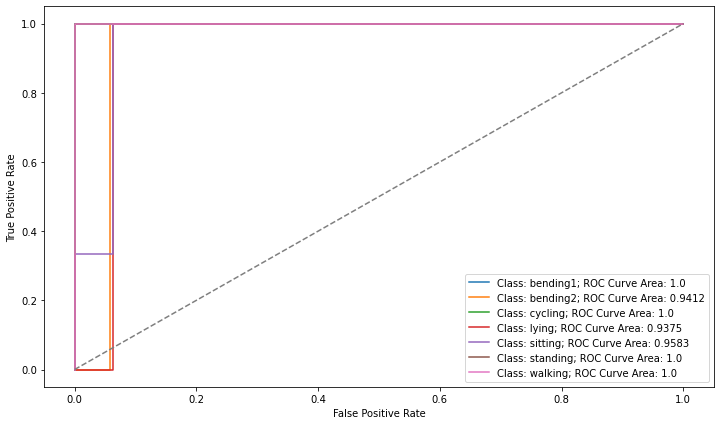

In [296]:
print(f'Running Baive Bayes Classifier with Gaussian Prior logistic regression for l-value {optimal_L}')
print(f'Display ROC for test set')
train_set, test_set = gen_df_multi(optimal_L)
X_train = train_set.drop('Label', axis=1)
y_train = train_set['Label']
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']


classifier2 = GaussianNB()
classifier2.fit(X_train, y_train)

## confusion matrix
y_pred = classifier2.predict(X_test)
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt

## multi-class roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


## predictY probability
y_pred_proba = classifier2.predict_proba(X_test)

## roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 6
fig, axes = plt.subplots(figsize=(12, 7))
for i, clazz in enumerate(classifier2.classes_):
    y_predicted = y_pred_proba[:, i]
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted, pos_label=clazz)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"Class: {clazz}; ROC Curve Area: {round(roc_auc, 4)}")

axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

In [298]:
## naive bayes' classifier with Gaussian

from sklearn.naive_bayes import MultinomialNB

max_test_accuracy = 0
optimal_L = 0
def logistic_regression_l1(classifier,split,kwargs):
    print(f'Running L1-penalized logistic regression for l-value {l_val}')
    train_set, test_set = gen_df_multi(split)
    X_train = train_set.drop('Label', axis=1)
    y_train = train_set['Label']
    X_test = test_set.drop('Label', axis=1)
    y_test = test_set['Label']


    classifier2 = classifier(**kwargs)
    classifier2.fit(X_train, y_train)


    train_score = round(classifier2.score(X_train, y_train), 4)
    test_score = round(classifier2.score(X_test, y_test), 4)
    print(f'Value of L: {l_val} | train_score: {train_score} | test_score: {test_score}')
    print(f'Value of L: {l_val} | train_error: {round((1 - train_score), 4)} | test_error: {round((1 - test_score), 4)}\n')
    global max_test_accuracy
    global optimal_L
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        optimal_L = l_val
        
    if l_val == 20:
        print('\n')
        print(f'The maximum accuracy is {max_test_accuracy} (for L-value: {optimal_L})')
        print(f'Further calculations will be done with L-value: {optimal_L}')

    return classifier2




for l_val in range(1, 21):
    selector = logistic_regression_l1(MultinomialNB,l_val, kwargs)

Running L1-penalized logistic regression for l-value 1
Value of L: 1 | train_score: 0.5507 | test_score: 0.7368
Value of L: 1 | train_error: 0.4493 | test_error: 0.2632

Running L1-penalized logistic regression for l-value 2
Value of L: 2 | train_score: 0.6522 | test_score: 0.6316
Value of L: 2 | train_error: 0.3478 | test_error: 0.3684

Running L1-penalized logistic regression for l-value 3
Value of L: 3 | train_score: 0.7826 | test_score: 0.6316
Value of L: 3 | train_error: 0.2174 | test_error: 0.3684

Running L1-penalized logistic regression for l-value 4
Value of L: 4 | train_score: 0.7971 | test_score: 0.6316
Value of L: 4 | train_error: 0.2029 | test_error: 0.3684

Running L1-penalized logistic regression for l-value 5
Value of L: 5 | train_score: 0.8261 | test_score: 0.6316
Value of L: 5 | train_error: 0.1739 | test_error: 0.3684

Running L1-penalized logistic regression for l-value 6
Value of L: 6 | train_score: 0.8406 | test_score: 0.6316
Value of L: 6 | train_error: 0.1594 | 

Running Baive Bayes Classifier with Multinomial Prior logistic regression for l-value 1
Display ROC for test set


MultinomialNB()

[[ 0  0  0  5  0  0  0]
 [ 0  3  0  0  1  0  0]
 [ 0  0  9  0  0  0  3]
 [ 0  0  0  6  5  1  0]
 [ 0  0  1  4  5  2  0]
 [ 0  0  0  4  5  3  0]
 [ 0  0  0  0  0  0 12]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

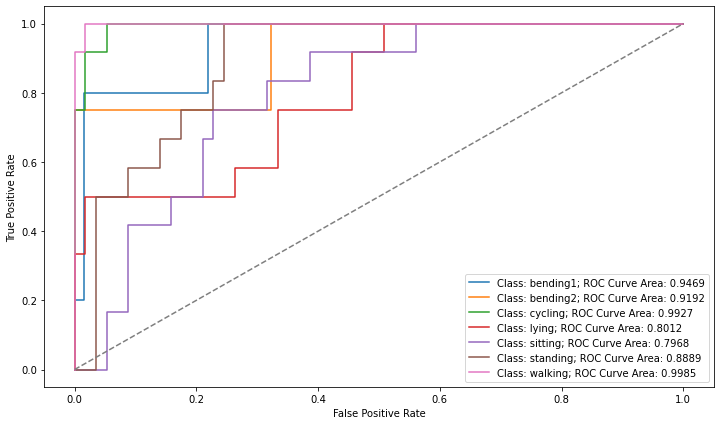

In [299]:
print(f'Running Baive Bayes Classifier with Multinomial Prior logistic regression for l-value {optimal_L}')
print(f'Display ROC for test set')
train_set, test_set = gen_df_multi(optimal_L)
X_train = train_set.drop('Label', axis=1)
y_train = train_set['Label']
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']


classifier2 = MultinomialNB()
classifier2.fit(X_train, y_train)

## confusion matrix
y_pred = classifier2.predict(X_train)
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)

import matplotlib.pyplot as plt

## multi-class roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


## predictY probability
y_pred_proba = classifier2.predict_proba(X_train)

## roc curve for classes
fpr = {}
tpr = {}
thresh ={}

fig, axes = plt.subplots(figsize=(12, 7))
for i, classname in enumerate(classifier2.classes_):
    y_predicted = y_pred_proba[:, i]
    fpr, tpr, thresholds = roc_curve(y_train, y_predicted, pos_label=classname)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"Class: {classname}; ROC Curve Area: {round(roc_auc, 4)}")

axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

Running Baive Bayes Classifier with Multinomial Prior logistic regression for l-value 1
Display ROC for test set


MultinomialNB()

[[0 0 0 2 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 3 0 0 0 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

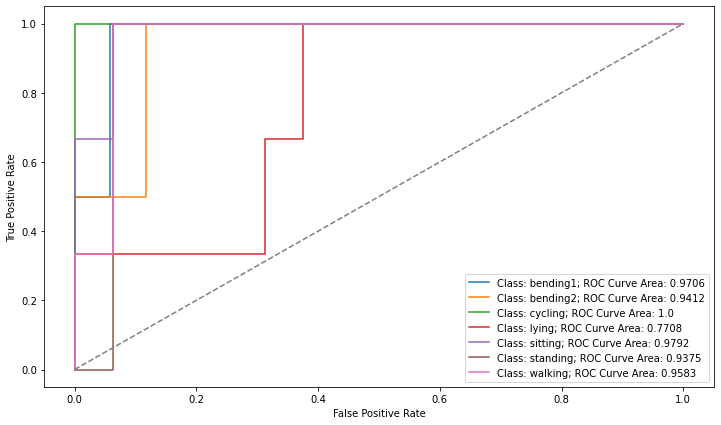

In [300]:
print(f'Running Baive Bayes Classifier with Multinomial Prior logistic regression for l-value {optimal_L}')
print(f'Display ROC for test set')
train_set, test_set = gen_df_multi(optimal_L)
X_train = train_set.drop('Label', axis=1)
y_train = train_set['Label']
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']


classifier2 = MultinomialNB()
classifier2.fit(X_train, y_train)

## confusion matrix
y_pred = classifier2.predict(X_test)
## predictY probability
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt

## multi-class roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


## predictY probability
y_pred_proba = classifier2.predict_proba(X_test)

## roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 6
fig, axes = plt.subplots(figsize=(12, 7))
for i, clazz in enumerate(classifier2.classes_):
    y_predicted = y_pred_proba[:, i]
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted, pos_label=clazz)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"Class: {clazz}; ROC Curve Area: {round(roc_auc, 4)}")

axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

#### ii. Comparison

I would say Naive Bayers Classifier with Gaussian performed relatively better than Multinomial Naive and Normal Multiclass logistic regression by looking at the ROC curves.

## 3. ISLR 4.8.3

## 4. ISLR 4.8.7

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9